C:\Users\xiaofengq\AppData\Local\Temp\ipykernel_20608\2681054343.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


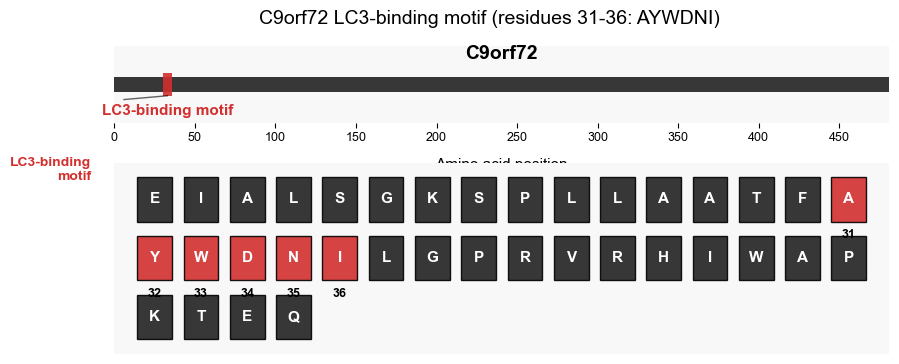

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 设置专业风格的参数
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # 默认字体大小
plt.rcParams['axes.linewidth'] = 1.0

# 蛋白质序列和motif信息
protein_name = "C9orf72"
protein_sequence = "MSTLCPPPSPAVAKTEIALSGKSPLLAATFAYWDNILGPRVRHIWAPKTEQVLLSDGEITFLANHTLNGEILRNAESGAIDVKFFVLSEKGVIIVSLIFDGNWNGDRSTYGLSIILPQTELSFYLPLHRVCVDRLTHIIRKGRIWMHKERQENVQKIILEGTERMEDQGQSIIPMLTGEVIPVMELLSSMKSHSVPEEIDIADTVLNDDDIGDSCHEGFLLNAISSHLQTCGCSVVVGSSAEKVNKIVRTLCLFLTPAERKCSRLCEAESSFKYESGLFVQGLLKDSTGSFVLPFRQVMYAPYPTTHIDVDVNTVKQMPPCHEHIYNQRRYMRSELTAFWRATSEEDMAQDTIIYTDESFTPDLNIFQDVLHRDTLVKAFLDQVFQLKPGLSLRSTFLAQFLLVLHRKALTLIKYIEDDTQKGKKPFKSLRNLKIDLDLTAEGDLNIIMALAEKIKPGLHSFIFGRPFYTSVQERDVLMTF"
motif_start = 31  # 1-based indexing
motif_end = 36    # 1-based indexing
motif_sequence = "AYWDNI"

# 转换为0-based索引
start_idx = motif_start - 1
end_idx = motif_end

# 创建图形，调整大小确保所有内容都能显示
fig = plt.figure(figsize=(10, 4))
gs = plt.GridSpec(2, 1, height_ratios=[1, 2.5], hspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# 设置背景颜色
fig.patch.set_facecolor('white')
ax1.set_facecolor('#f8f8f8')
ax2.set_facecolor('#f8f8f8')

# 上方面板：蛋白质全长示意图
protein_length = len(protein_sequence)
ax1.add_patch(patches.Rectangle((0, 0.4), protein_length, 0.2, 
                               facecolor='#222222', edgecolor='none', alpha=0.9))
ax1.add_patch(patches.Rectangle((start_idx, 0.35), end_idx - start_idx, 0.3, 
                               facecolor='#D32F2F', edgecolor='none', alpha=0.9))

# 添加刻度和标签
positions = np.arange(0, protein_length+1, 50)
ax1.set_xticks(positions)
ax1.set_xticklabels([str(p) for p in positions], fontsize=9)
ax1.set_xlim(0, protein_length)
ax1.set_ylim(0, 1)
ax1.set_yticks([])
ax1.set_xlabel('Amino acid position', fontsize=11, labelpad=10)
ax1.text(protein_length/2, 0.9, protein_name, ha='center', va='center', 
        fontsize=14, fontweight='bold')
ax1.text(start_idx + (end_idx - start_idx)/2, 0.15, 'LC3-binding motif', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='#D32F2F')

# 移除上方面板的边框
for spine in ax1.spines.values():
    spine.set_visible(False)

# 下方面板：氨基酸序列细节
# 选择显示motif前后各15个氨基酸
display_start = max(0, start_idx - 15)
display_end = min(len(protein_sequence), end_idx + 15)
display_sequence = protein_sequence[display_start:display_end]

# 设置每行显示的氨基酸数量
aa_per_row = 16
num_rows = int(np.ceil(len(display_sequence) / aa_per_row))

# 创建氨基酸网格
aa_width = 0.6
aa_height = 0.6
horizontal_spacing = 0.8
vertical_spacing = 0.8

# 计算起始位置使网格居中 - 修复这里的计算
total_width = (aa_per_row - 1) * horizontal_spacing + aa_width
start_x = -total_width / 2

# 绘制每个氨基酸
for i, aa in enumerate(display_sequence):
    pos = display_start + i
    row = i // aa_per_row
    col = i % aa_per_row
    
    # 计算氨基酸位置
    x = col * horizontal_spacing + start_x
    y = -row * vertical_spacing
    
    # 确定颜色
    if start_idx <= pos < end_idx:
        color = '#D32F2F'  # 红色突出显示motif
        text_color = 'white'
    else:
        color = '#222222'  # 黑色表示其他氨基酸
        text_color = 'white'
    
    # 绘制氨基酸方块
    rect = patches.Rectangle((x, y), aa_width, aa_height, 
                            facecolor=color, edgecolor='black', 
                            linewidth=1.0, alpha=0.9)
    ax2.add_patch(rect)
    
    # 添加氨基酸字母
    ax2.text(x + aa_width/2, y + aa_height/2, aa, 
             ha='center', va='center', fontsize=11, 
             fontweight='bold', color=text_color)
    
    # 只在motif区域添加位置编号
    if start_idx <= pos < end_idx:
        ax2.text(x + aa_width/2, y - 0.1, str(pos + 1), 
                ha='center', va='top', fontsize=9, fontweight='bold')

# 设置下方面板的坐标轴 - 修复x轴范围计算
ax2.set_xlim(start_x - horizontal_spacing/2, 
             start_x + total_width + horizontal_spacing/2)
ax2.set_ylim(-(num_rows-1) * vertical_spacing - 0.2, 0.8)

ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])

# 移除下方面板的边框
for spine in ax2.spines.values():
    spine.set_visible(False)

# 添加连接线 - 修复连接线坐标计算
motif_center_x = start_x + ((start_idx - display_start) % aa_per_row) * horizontal_spacing + aa_width/2
motif_center_y = -((start_idx - display_start) // aa_per_row) * vertical_spacing + aa_height/2

ax1.plot([start_idx + (end_idx - start_idx)/2, motif_center_x], 
         [0.35, motif_center_y], 'k-', lw=1.0, alpha=0.6, clip_on=False)

# 添加图例
ax2.text(start_x - horizontal_spacing, 0.7, 'LC3-binding\nmotif', 
         ha='right', va='center', fontsize=10, 
         color='#D32F2F', fontweight='bold')

# 添加标题
plt.suptitle('C9orf72 LC3-binding motif (residues 31-36: AYWDNI)', 
             fontsize=14, fontweight='regular', y=0.97)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 保存图像为TIFF和PDF格式
plt.savefig('C9orf72_LC3_motif_final.tiff', dpi=600, bbox_inches='tight', format='tiff')
plt.savefig('C9orf72_LC3_motif_final.pdf', bbox_inches='tight', format='pdf')

plt.show()

In [27]:
import os
os.getcwd()

'h:\\Analysis\\Python_code\\code\\tool'